## 14. Лабораторная работа «Иерархическая кластеризация»

Dataset: [Wine](https://archive.ics.uci.edu/ml/datasets/Wine)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score,    completeness_score, v_measure_score, silhouette_score)
from scipy.cluster.hierarchy import dendrogram
import os
import requests

%matplotlib inline
pd.options.display.max_columns = None

In [3]:
header = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
           "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]  
data = pd.read_csv("wine.data", names=header)
data["Class"] = data["Class"].astype("category")
data.sample(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
64,2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560
24,1,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
149,3,13.08,3.90,2.36,21.5,113,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550


In [4]:
display(data.describe())

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
X = data.drop(columns=["Class"]).copy()

ac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
ac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0, linkage='ward',
                        memory=None, n_clusters=None)

In [8]:
def draw_dendrogram(ac):
    counts = np.zeros(ac.children_.shape[0])
    n_samples = len(ac.labels_)
    for i, merge in enumerate(ac.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([ac.children_, ac.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, truncate_mode='level', p=4)

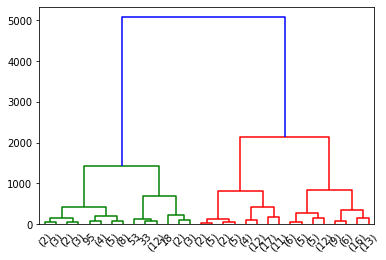

In [9]:
draw_dendrogram(ac)

In [10]:
y = data["Class"].copy()
scores = [{
    'ARI': adjusted_rand_score(y, ac.labels_),
    'AMI': adjusted_mutual_info_score(y, ac.labels_),
    'Homogenity': homogeneity_score(y, ac.labels_),
    'Completeness': completeness_score(y, ac.labels_),
    'V-measure': v_measure_score(y, ac.labels_)
}]
columns=['ARI', 'AMI', 'Homogenity', 'Completeness', 'V-measure']
pd.DataFrame(data=scores, columns=columns, index=["Hierarchical"])

,ARI,AMI,Homogenity,Completeness,V-measure
Hierarchical,0.0,2.678146e-14,1.0,0.209588,0.346544
